# Pre-processing and exploration of the data

# Summary
* [First glimpse in our dataset features](#features)
* [Pre-processing : checking for NaN values](#preprocessing)
    * [Beer datasets](#beer_processing)
    * [User datasets](#user_processing)
    * [Brewery datasets](#brewery_processing)
    
* [Exploration of the datasets](#exploration)
    * [Textual reviews](#textual_reviews)

* [SAT dataset matches with BeerAdvocate and RateBeer](#sat)
* [Statistical analysis, first draft](#draft)

In [1]:
#Uploading of the necessary libraries:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import re
from functions import read_data

In [2]:
#Uploading of the datasets: 

DATASET_BEERADVOCATE = 'DATA/BeerAdvocate/'
DATASET_RATEBEER = 'DATA/RateBeer/'


#Beer advocate dataset
df_adv_beer = pd.read_csv(DATASET_BEERADVOCATE + 'beers.csv')
df_adv_breweries = pd.read_csv(DATASET_BEERADVOCATE + 'breweries.csv')
df_adv_users = pd.read_csv(DATASET_BEERADVOCATE + 'users.csv')

#Ratebeer dataset
df_rb_beer = pd.read_csv(DATASET_RATEBEER + 'beers.csv')
df_rb_breweries = pd.read_csv(DATASET_RATEBEER + 'breweries.csv')
df_rb_users = pd.read_csv(DATASET_RATEBEER + 'users.csv')

<a id='preprocessing'></a>

## Pre-processing: checking for NaN values


<a id='beer_processing'></a>

### Beer datasets

In [3]:
#Let's have a look 
df_adv_beer.head()

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,166064,Nashe Moskovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.7,NaN,NaN,0,NaN
1,166065,Nashe Pivovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,3.8,NaN,NaN,0,NaN
2,166066,Nashe Shakhterskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.8,NaN,NaN,0,NaN
3,166067,Nashe Zhigulevskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.0,NaN,NaN,0,NaN
4,166063,Zhivoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.5,NaN,NaN,0,NaN


In [4]:
df_rb_beer.head()

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,overall_score,style_score,avg,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,410549,33 Export (Gabon),3198,Sobraga,Pale Lager,1,NaN,NaN,2.72,5.0,2.000000,NaN,0,NaN
1,105273,Castel Beer (Gabon),3198,Sobraga,Pale Lager,10,5.0,58.0,2.18,5.2,1.910000,NaN,0,NaN
2,19445,Régab,3198,Sobraga,Pale Lager,27,1.0,22.0,1.83,4.5,1.811111,NaN,0,NaN
3,155699,Ards Bally Black Stout,13538,Ards Brewing Co.,Stout,6,NaN,NaN,3.18,4.6,3.866667,0.823699,6,3.866667
4,239097,Ards Belfast 366,13538,Ards Brewing Co.,Golden Ale/Blond Ale,1,NaN,NaN,2.79,4.2,3.000000,NaN,0,NaN


In [5]:
#Let's check the shape of the datasets: 

print("Beer advocate beer dataset has {} rows and {} colomns".format(df_adv_beer.shape[0],df_adv_beer.shape[1]))
print("RateBeer beer dataset has {} rows and {} colomns".format(df_rb_beer.shape[0],df_rb_beer.shape[1]))


Beer advocate beer dataset has 280823 rows and 15 colomns
RateBeer beer dataset has 442081 rows and 14 colomns


In [6]:
#We are looking at the proportion of NaNs in each column of the beer datasets.
##Creation of 3 dataframes, one for each dataset having 3 columns
list = ['Total','NaN_proportion','NaN_number']
dfnan_adv = pd.DataFrame(columns = list)
dfnan_rate = pd.DataFrame(columns = list)


dfnan_adv['NaN_proportion'] = (df_adv_beer.isna().sum()/df_adv_beer.shape[0]) #proportion of NaN values in each column 
dfnan_adv['NaN_number'] = (df_adv_beer.isna().sum()) #total number of NaN values in each column 
dfnan_adv.loc[:,'Total'] = df_adv_beer.shape[0] #Number of rows in the dataset

dfnan_rate['NaN_proportion'] = (df_rb_beer.isna().sum()/df_rb_beer.shape[0])
dfnan_rate['NaN_number'] = (df_rb_beer.isna().sum())
dfnan_rate.loc[:,'Total'] = df_rb_beer.shape[0]


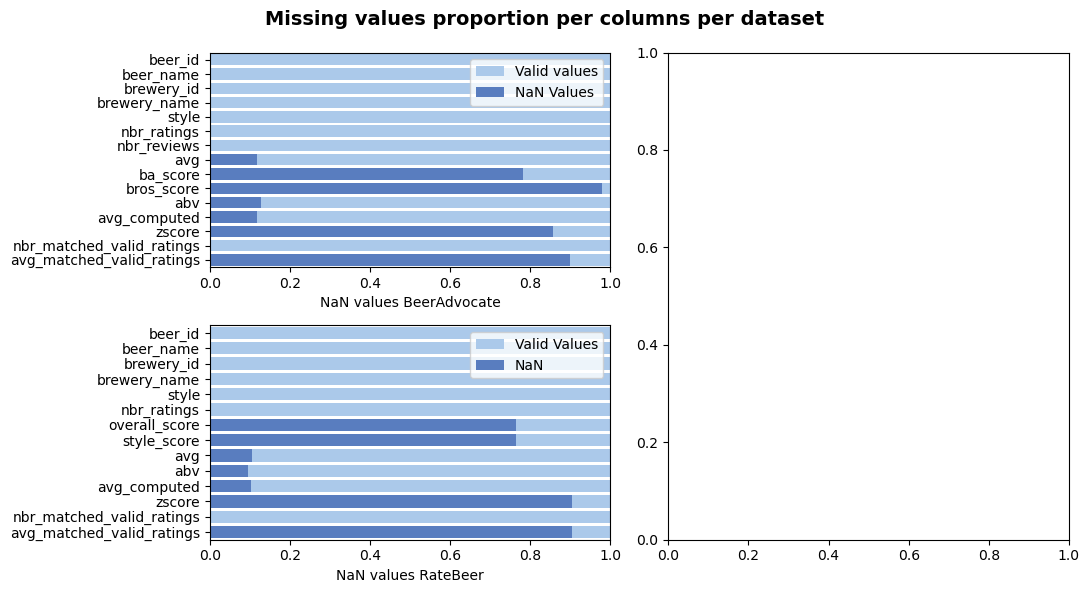

In [7]:
#We will look at the distribution of NaNs in each dataset.
plt.close('all')
fig = plt.figure(figsize=(11,6))

ax1 = plt.subplot(221)
ax2 = plt.subplot(223)
ax3 = plt.subplot(122)


sns.set_color_codes("pastel")
sns.barplot(x="Total", y = dfnan_adv.index, data=dfnan_adv, label="Valid values", color="b", ax=ax1)

sns.set_color_codes("muted")
sns.barplot(x='NaN_proportion', y = dfnan_adv.index, data=dfnan_adv, label="NaN Values", color="b", ax=ax1)

ax1.legend(ncol=1, loc="upper right", frameon=True)
ax1.set(xlim=(0, 1), ylabel="", xlabel="NaN values BeerAdvocate")



sns.set_color_codes("pastel")
sns.barplot(x="Total", y = dfnan_rate.index, data=dfnan_rate, label="Valid Values", color="b",ax=ax2)

sns.set_color_codes("muted")
sns.barplot(x='NaN_proportion',  y = dfnan_rate.index, data=dfnan_rate, label="NaN", color="b", ax=ax2)

ax2.legend(ncol=1, loc="upper right", frameon=True)
ax2.set(xlim=(0, 1), ylabel="", xlabel="NaN values RateBeer") 



plt.suptitle('Missing values proportion per columns per dataset', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [8]:
# Checking missing values in  breweries from all dataset and in the users dataset from MatchedBeer, 
# we see that there are no missing values

print('Test of the presences of NaN in the entire breweris datasets from AdvocatedBeer and RateBeer:', df_adv_breweries.isna().values.any(),
      'and ', df_rb_breweries.isna().values.any())

Test of the presences of NaN in the entire breweris datasets from AdvocatedBeer and RateBeer: False and  False


In [9]:
# analyze missing values in the AdvocateBeer breweries dataset and see that there are less than 30% of missing values 
df_adv_users.isna().sum()/df_adv_users.shape[0]

nbr_ratings    0.000000
nbr_reviews    0.000000
user_id        0.000000
user_name      0.000007
joined         0.017254
location       0.203502
dtype: float64

In [10]:
# analyze missing values in the RateBeer breweries dataset and see that there are less thqn 30% of missing values 
df_rb_users.isna().sum()/df_rb_users.shape[0]

nbr_ratings    0.000000
user_id        0.000000
user_name      0.000000
joined         0.000428
location       0.279049
dtype: float64

We notice that a number of columns have a very high percentage of NA values especially in the Beer datasets. Analysis on these columns would be limited to a very narrow portion of the dataset, so we decide to drop these columns instead. We decide to drop columns that have more than 60% of NA values. 

In [11]:
df_adv_beer = df_adv_beer[df_adv_beer.columns[df_adv_beer.isna().sum()/df_adv_beer.shape[0] < 0.60]]
df_rb_beer=df_rb_beer[df_rb_beer.columns[df_rb_beer.isna().sum()/df_rb_beer.shape[0] < 0.60]]

In [12]:
#We check that all beers are unique in both datasets
print(df_adv_beer["beer_id"].nunique()==df_adv_beer.shape[0])
print(df_rb_beer["beer_id"].nunique()==df_rb_beer.shape[0])


True
True


In [13]:
#Some beers don't have ratings. We are not interested in them, so we drop them
df_adv_beer_wrating=df_adv_beer.drop(df_adv_beer[df_adv_beer['nbr_ratings']==0].index)
print("{} beers of the Beer Advocate dataset have been dropped".format((df_adv_beer.shape[0]-df_adv_beer_wrating.shape[0])))
df_rb_beer_wrating=df_rb_beer.drop(df_rb_beer[df_rb_beer['nbr_ratings']==0].index)
print("{} beers of the RateBeer dataset have been dropped".format((df_rb_beer.shape[0]-df_rb_beer_wrating.shape[0])))


32841 beers of the Beer Advocate dataset have been dropped
45391 beers of the RateBeer dataset have been dropped


### Ratings datasets

In [14]:
small_rating=small_rating.drop(columns=["text"]) #we get rid of the text column because we won't perform textual analysis here
smallrating["rating"]=pd.to_numeric(smallrating["rating"]) #We convert the ratings from floats to numeric data

NameError: name 'small_rating' is not defined

<a id='user_processing'></a>

### Users datasets 

In [20]:
#Let's have a look 
df_adv_users.head()

,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
0,7820,465,nmann08.184925,nmann08,1.199704e+09,"United States, Washington"
1,2521,2504,stjamesgate.163714,StJamesGate,1.191838e+09,"United States, New York"
2,1797,1143,mdagnew.19527,mdagnew,1.116410e+09,Northern Ireland
3,31,31,helloloser12345.10867,helloloser12345,1.101380e+09,Northern Ireland
4,604,604,cypressbob.3708,cypressbob,1.069326e+09,Northern Ireland


In [21]:
df_rb_users.head()

,nbr_ratings,user_id,user_name,joined,location
0,1890,175852,Manslow,1.337508e+09,Poland
1,89,442761,MAGICuenca91,1.484046e+09,Spain
2,169,288889,Sibarh,1.384600e+09,Poland
3,3371,250510,fombe89,1.363950e+09,Spain
4,13043,122778,kevnic2008,1.296644e+09,Germany


In [22]:
#Let's check the shape of the datasets
print("Beer advocate users dataset has {} rows and {} colomns".format(df_adv_users.shape[0],df_adv_users.shape[1]))
print("RateBeer users dataset has {} rows and {} colomns".format(df_rb_users.shape[0],df_rb_users.shape[1]))


Beer advocate users dataset has 153704 rows and 6 colomns
RateBeer users dataset has 70174 rows and 5 colomns


In [23]:
#Drop users that are in duplicates in the dataset

df_adv_unique_users=df_adv_users.drop_duplicates(subset="user_id",keep="first") #suppresses all copies of same user_id and keeps the first instance
#sanity check 
print(df_adv_unique_users.shape[0]==df_adv_unique_users["user_id"].nunique())

df_rb_unique_users=df_rb_users.drop_duplicates(subset="user_id",keep="first") 
#sanity check 
print(df_rb_unique_users.shape[0]==df_rb_unique_users["user_id"].nunique())



True
True


<a id='brewery_processing'></a>

### Breweries dataset

In [24]:
#Let's check the shape of the breweries dataset
print("Beer advocate breweries dataset has {} rows and {} colomns".format(df_adv_breweries.shape[0],df_adv_breweries.shape[1]))
print("RateBeer breweries dataset has {} rows and {} colomns".format(df_rb_breweries.shape[0],df_rb_breweries.shape[1]))


Beer advocate breweries dataset has 16758 rows and 4 colomns
RateBeer breweries dataset has 24189 rows and 4 colomns


In [25]:
#Let's have a look
df_adv_breweries.head()

,id,location,name,nbr_beers
0,39912,Kyrgyzstan,Abdysh-Ata (Абдыш Ата),5
1,39913,Kyrgyzstan,Arpa (АРПА),1
2,39914,Kyrgyzstan,Bear Beer,4
3,39915,Kyrgyzstan,Blonder Pub,4
4,39916,Kyrgyzstan,Kellers Bier,2


In [26]:
df_rb_breweries.head()

,id,location,name,nbr_beers
0,3198,Gabon,Sobraga,3
1,13538,Northern Ireland,Ards Brewing Co.,13
2,22304,Northern Ireland,Barrahooley Craft Brewery,4
3,22818,Northern Ireland,Boundary,66
4,24297,Northern Ireland,Brewbot Belfast,3


In [27]:
#We don't care about breweries that don't have any beers, so we drop them 

df_adv_breweries_wbeer=df_adv_breweries.drop(df_adv_breweries[df_adv_breweries['nbr_beers']==0].index)
print("{} breweries have been dropped from the Beer Advocate dataset".format((df_adv_breweries.shape[0]-df_adv_breweries_wbeer.shape[0])))

df_rb_breweries_wbeer=df_rb_breweries.drop(df_rb_breweries[df_rb_breweries['nbr_beers']==0].index)
df_rb_breweries_wbeer['nbr_beers'].sort_values(ascending=True)
print("{} breweries have been dropped from the RateBeer dataset".format((df_rb_breweries.shape[0]-df_rb_breweries_wbeer.shape[0])))




2236 breweries have been dropped from the Beer Advocate dataset
71 breweries have been dropped from the RateBeer dataset


<a id='exploration'></a>

## Exploration of the datasets 


### Beers dataset

In [28]:
#Histograms
#Beers binned by ratings count:
quantiles = [0.25, 0.5, 0.75]

titles = ['Beer Advocate - ratings by beer','Rate Beer - ratings by beer', 'Matched RateBeer - ratings by beer','Matched Beer Advocate - ratings by beer']
plot_data = [df_adv_beer_wrating.nbr_ratings, df_rb_beer_wrating.nbr_ratings,  df_md_beer_wrating.rb_nbr_ratings, df_md_beer_wrating.ba_nbr_ratings]


fig, axes = plt.subplots(2, 2, figsize=(20, 7),sharey=True,sharex=True)
fig.tight_layout(pad=5)
for i,datum in enumerate(plot_data):
    sns.histplot(ax=axes.flat[i],data=datum,bins=100,log_scale=(True,True), kde=False, color="blue")
    axes.flat[i].set_xlabel("Beer count")
    axes.flat[i].set_ylabel("Rating Count")
    axes.flat[i].set_title(titles[i], pad=20)
    for q in quantiles:
        axes.flat[i].axvline(plot_data[i].quantile(q), 0, 1, color="black", ls='--',linewidth=3)
        axes.flat[i].text(plot_data[i].quantile(q)+0.1, 2e5, str(int(q*100))+'%', horizontalalignment='left', size='medium', color='black', weight='semibold')

NameError: name 'df_md_beer_wrating' is not defined

We observe a skewed distribution of beers according to the rating count.

In [29]:
#Some stats
print(df_adv_beer_wrating.shape)
df_adv_beer_wrating[["nbr_ratings","avg","abv","avg_computed"]].describe()

(247982, 11)


,nbr_ratings,avg,abv,avg_computed
count,247982.000000,247982.000000,217107.000000,247982.000000
mean,33.845327,3.721189,6.541211,3.717594
std,245.558727,0.475414,2.076558,0.464248
min,1.000000,0.000000,0.010000,1.000000
25%,1.000000,3.500000,5.000000,3.500000
50%,3.000000,3.780000,6.000000,3.770000
75%,9.000000,4.010000,7.500000,4.000000
max,16509.000000,5.000000,67.500000,5.000000


In [30]:
print(df_rb_beer_wrating.shape)
df_rb_beer_wrating[["nbr_ratings","avg","abv","avg_computed"]].describe()

(396690, 10)


,nbr_ratings,avg,abv,avg_computed
count,396690.000000,395647.000000,359958.000000,396690.000000
mean,17.953752,3.026657,6.059846,3.244649
std,85.303131,0.304127,1.928548,0.507520
min,1.000000,0.000000,0.010000,0.500000
25%,1.000000,2.870000,4.800000,3.000000
50%,3.000000,3.020000,5.500000,3.300000
75%,10.000000,3.180000,7.000000,3.594088
max,5272.000000,4.520000,73.000000,5.000000


### Users

In [31]:
#Users binned by rating count

titles = ['Beer Advocate - ratings by user','Rate Beer - ratings by user', 'Matched RateBeer - ratings by user','Matched Beer Advocate - ratings by user']
plot_data = [df_rb_unique_users.nbr_ratings, df_adv_unique_users.nbr_ratings, df_md_unique_ba_users.ba_nbr_ratings,df_md_unique_rb_users.rb_nbr_ratings]


fig, axes = plt.subplots(2, 2, figsize=(20, 7),sharey=True,sharex=True)
fig.tight_layout(pad=5)
for i,datum in enumerate(plot_data):
    sns.histplot(ax=axes.flat[i],data=datum,bins=100,log_scale=(True,True), kde=False,color="blue")
    axes.flat[i].set_xlabel("Rating count")
    axes.flat[i].set_ylabel("User Count")
    axes.flat[i].set_title(titles[i], pad=20)
    for q in quantiles:
        #Offset of 0.1 so it is more lisible
        axes.flat[i].axvline(plot_data[i].quantile(q)+0.1, 0, 1, color="black", ls='--',linewidth=3)
        axes.flat[i].text(plot_data[i].quantile(q)+0.1, 1e5, str(int(q*100))+'%', horizontalalignment='left', size='medium', color='black', weight='semibold')
      

NameError: name 'df_md_unique_ba_users' is not defined

We observe a skewed distribution of the number of ratings according to the number of raters. 

In [30]:
#Some stats
print(df_adv_unique_users.shape)
df_adv_unique_users[["nbr_ratings"]].describe()

(153704, 6)


,nbr_ratings
count,153704.000000
mean,54.605163
std,252.388790
min,1.000000
25%,1.000000
50%,3.000000
75%,16.000000
max,12046.000000


In [31]:
print(df_rb_unique_users.shape)
df_rb_unique_users[["nbr_ratings"]].describe()

(70120, 5)


,nbr_ratings
count,70120.000000
mean,108.903936
std,754.777751
min,1.000000
25%,1.000000
50%,2.000000
75%,10.000000
max,46749.000000


In [34]:
#Number of different locations the users come from: 
print("The users of Beer Advocate come from {} different locations".format(df_adv_unique_users["location"].nunique()))
print("The users of RateBeer come from {} different locations".format(df_rb_unique_users["location"].nunique()))


The users of Beer Advocate come from 194 different locations
The users of RateBeer come from 222 different locations
The Beer Advocate users of the Matched Beer dataset come from 110 different locations
The RateBeer users of the Matched Beer dataset come from 110 different locations


In [35]:
#Top 5 locations of the users for each dataset:
users_top5_locations=pd.DataFrame(columns=['Beer Advocate users','Rate Beer users','Matched Beer Advocate users','Matched Rate Beer users'])
users_top5_locations['Beer Advocate users']=df_adv_unique_users["location"].value_counts().index.tolist()[:5] #we sort the number of occurences of each location and extract the corresponding top 5 locations
users_top5_locations['Rate Beer users']=df_rb_unique_users["location"].value_counts().index.tolist()[:5]



users_top5_locations

,Beer Advocate users,Rate Beer users,Matched Beer Advocate users,Matched Rate Beer users
0,"United States, California",Canada,"United States, California","United States, California"
1,"United States, Pennsylvania","United States, California",Canada,Canada
2,"United States, New York",England,"United States, Pennsylvania","United States, Pennsylvania"
3,"United States, Illinois",Poland,"United States, Illinois","United States, Illinois"
4,"United States, Massachusetts","United States, Pennsylvania","United States, New York","United States, New York"


### Breweries

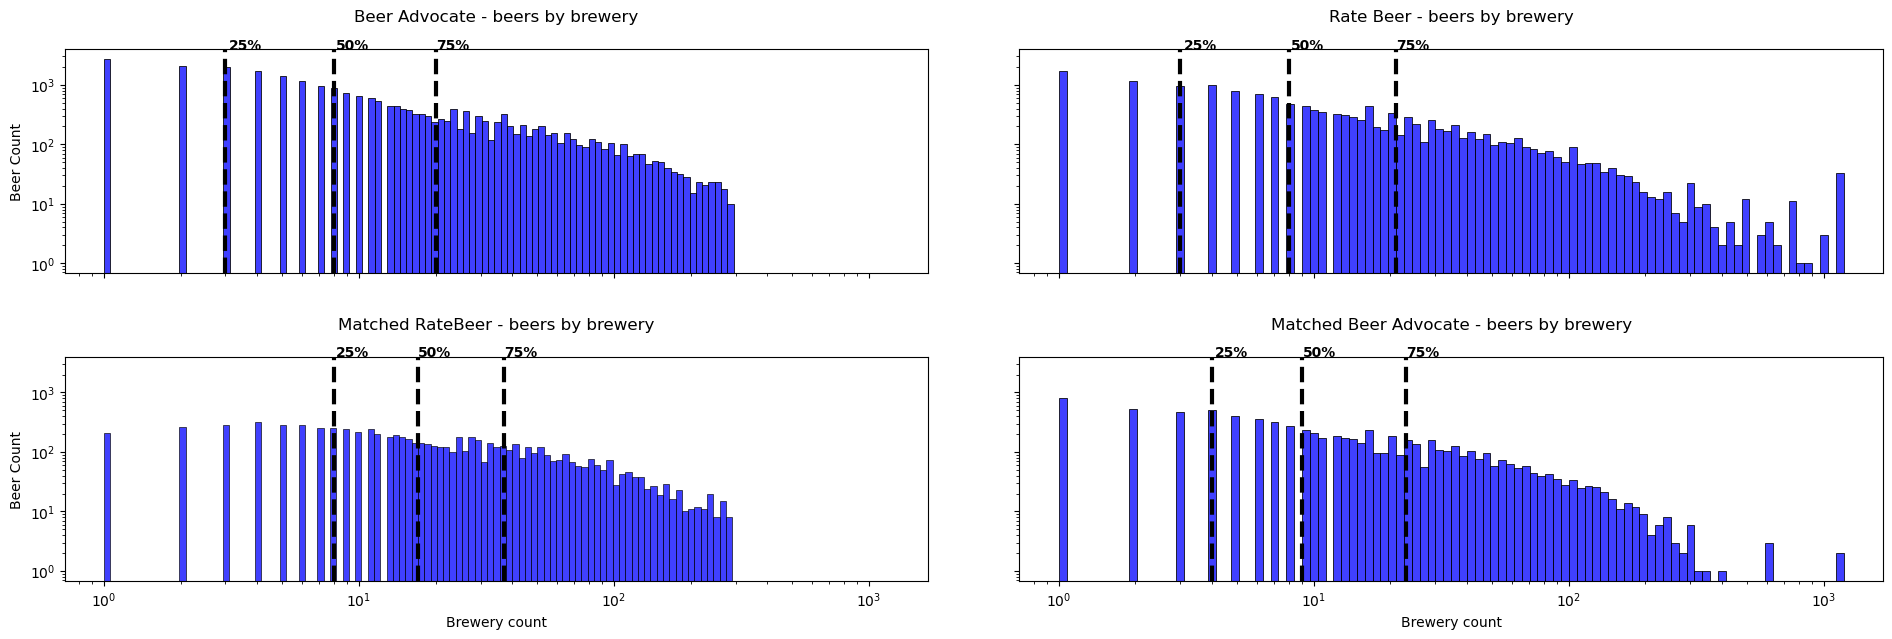

In [36]:
#Histograms
#Breweries binned by beer count

titles = ['Beer Advocate - beers by brewery','Rate Beer - beers by brewery', 'Matched RateBeer - beers by brewery','Matched Beer Advocate - beers by brewery']
plot_data = [df_rb_breweries_wbeer.nbr_beers, df_adv_breweries_wbeer.nbr_beers, df_md_breweries_wbeer.rb_nbr_beers,df_md_breweries_wbeer.ba_nbr_beers]

fig, axes = plt.subplots(2, 2, figsize=(20, 7),sharey=True,sharex=True)
fig.tight_layout(pad=5)
for i,datum in enumerate(plot_data):
    sns.histplot(ax=axes.flat[i],data=datum,bins=100,log_scale=(True,True), kde=False, color="blue")
    axes.flat[i].set_xlabel("Brewery count")
    axes.flat[i].set_ylabel("Beer Count")
    axes.flat[i].set_title(titles[i], pad=20)
    for q in quantiles:
        axes.flat[i].axvline(plot_data[i].quantile(q), 0, 1, color="black", ls='--',linewidth=3)
        axes.flat[i].text(plot_data[i].quantile(q)+0.1, 4e3, str(int(q*100))+'%', horizontalalignment='left', size='medium', color='black', weight='semibold')

    

We observe a skewed distribution of the number of breweries according to their beer count. In addition, we notice that the RateBeer dataset has no breweries with more than 200 beers. It is possible that some data was lost.

In [37]:
#Some stats
print(df_adv_breweries_wbeer.shape)
df_adv_breweries_wbeer[["nbr_beers"]].describe()

(14522, 4)


,nbr_beers
count,14522.000000
mean,24.298444
std,74.041044
min,1.000000
25%,3.000000
50%,8.000000
75%,21.000000
max,1196.000000


In [38]:
print(df_rb_breweries_wbeer.shape)
df_rb_breweries_wbeer[["nbr_beers"]].describe()

(24118, 4)


,nbr_beers
count,24118.000000
mean,19.078655
std,31.572100
min,1.000000
25%,3.000000
50%,8.000000
75%,20.000000
max,295.000000


In [40]:
#Number of different locations the breweries come from: 
print("The breweries of Beer Advocate come from {} different locations".format(df_adv_breweries_wbeer["location"].nunique()))
print("The breweries of RateBeer come from {} different locations".format(df_rb_breweries_wbeer["location"].nunique()))


The breweries of Beer Advocate come from 277 different locations
The breweries of RateBeer come from 267 different locations
The Beer Advocate breweries of the Matched Beer dataset come from 202 different locations
The RateBeer breweries of the Matched Beer dataset come from 202 different locations


In [41]:
#Top 5 locations of the breweries for each dataset:
breweries_top5_locations=pd.DataFrame(columns=['Beer Advocate breweries','Rate Beer breweries','Matched Beer Advocate breweries','Matched Rate Beer breweries'])
breweries_top5_locations['Beer Advocate breweries']=df_adv_breweries_wbeer["location"].value_counts().index.tolist()[:5] #we sort the number of occurences of each location and extract the corresponding top 5 locations
breweries_top5_locations['Rate Beer breweries']=df_rb_breweries_wbeer["location"].value_counts().index.tolist()[:5]
breweries_top5_locations['Matched Beer Advocate breweries']=df_md_breweries_wbeer["ba_location"].value_counts().index.tolist()[:5]
breweries_top5_locations['Matched Rate Beer breweries']=df_md_breweries_wbeer["rb_location"].value_counts().index.tolist()[:5]


breweries_top5_locations

,Beer Advocate breweries,Rate Beer breweries,Matched Beer Advocate breweries,Matched Rate Beer breweries
0,Germany,England,"United States, California","United States, California"
1,England,Germany,England,England
2,"United States, California",Italy,Germany,Germany
3,Canada,Canada,Canada,Canada
4,"United States, New York","United States, California","United States, Colorado","United States, Colorado"


<a id='textual_reviews'></a>
## Textual reviews and rating analysis

### Textual reviews

In [42]:
#Here we use a utilitary function to directly compute everything:
from functions import NLP_utils



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/joaoprado/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
RB_langs,RB_counts, RB_dates = NLP_utils.summary_analysis("RateBeer")

Started identifying languages, counting words and binning dates...
Done


In [44]:
BA_langs,BA_counts, BA_dates = NLP_utils.summary_analysis("BeerAdvocate")

Started identifying languages, counting words and binning dates...
Done


In [54]:
#The 5 most common languages for each dataset are:
print("Most common languages in RateBeer and their frequencies:")
display(RB_langs.value_counts()[:5]/len(RB_langs))
print("Most common languages in BeerAdvocate and their frequencies:")
display(BA_langs.value_counts()[:5]/len(BA_langs))


Most common languages in RateBeer and their frequencies:


English    0.930161
Polish     0.014833
French     0.013936
German     0.010353
Dutch      0.005139
Name: text, dtype: float64

Most common languages in BeerAdvocate and their frequencies:


English               0.998832
French                0.000312
Italian               0.000227
Spanish; Castilian    0.000134
German                0.000079
Name: text, dtype: float64

<AxesSubplot:title={'center':'Time evolution of RateBeer review posting'}, xlabel='date', ylabel='Count'>

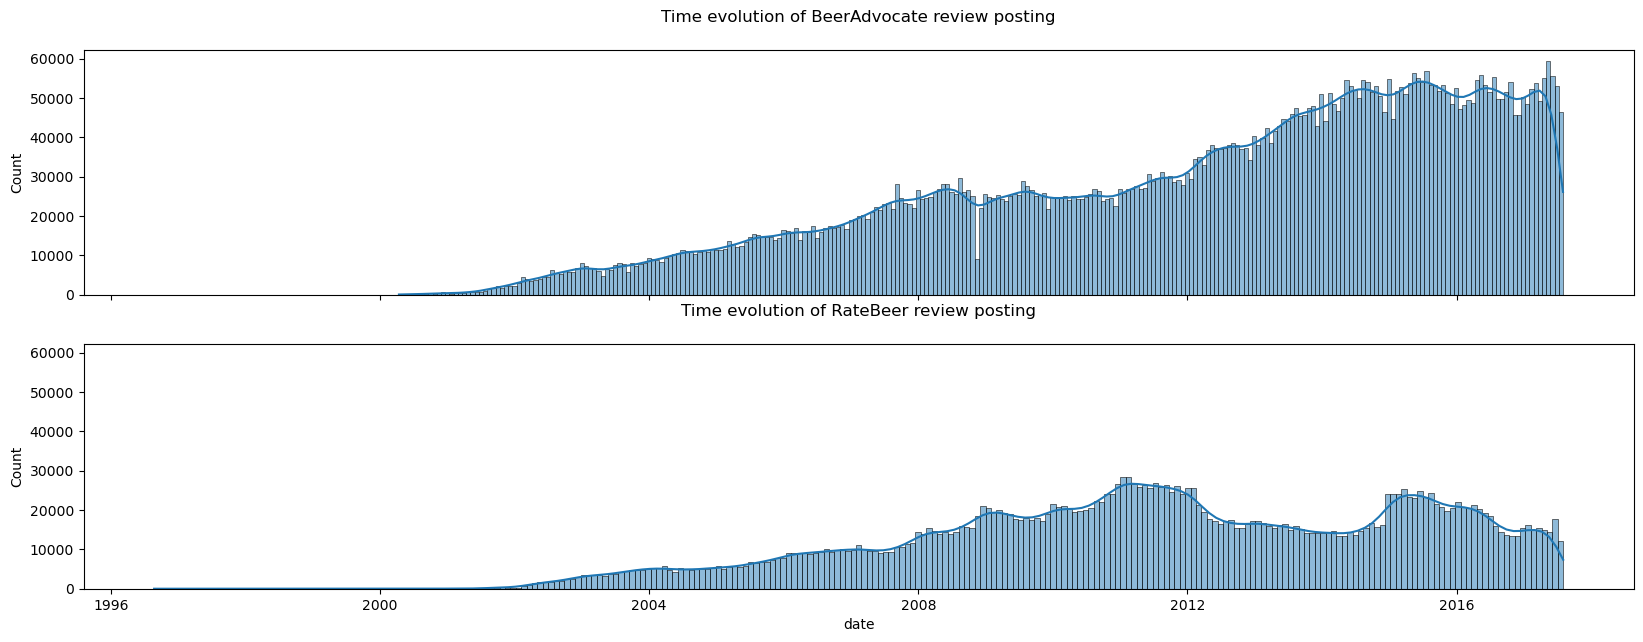

In [55]:
# How does the review rate of users changes with time for each site:

fig, axes = plt.subplots(2, 1, figsize=(20, 7),sharey=True,sharex=True)
RB_dates = pd.to_datetime(RB_dates,unit='s')
BA_dates = pd.to_datetime(BA_dates,unit='s')
axes[1].set_title("Time evolution of RateBeer review posting", pad=20)
sns.histplot(RB_dates,log_scale=(False,False),kde=True,ax=axes[0])
axes[0].set_title("Time evolution of BeerAdvocate review posting", pad=20)
sns.histplot(BA_dates,log_scale=(False,False),kde=True,ax=axes[1])

<AxesSubplot:title={'center':'Rate Beer - Review word count'}, xlabel='Word per review', ylabel='Review count'>

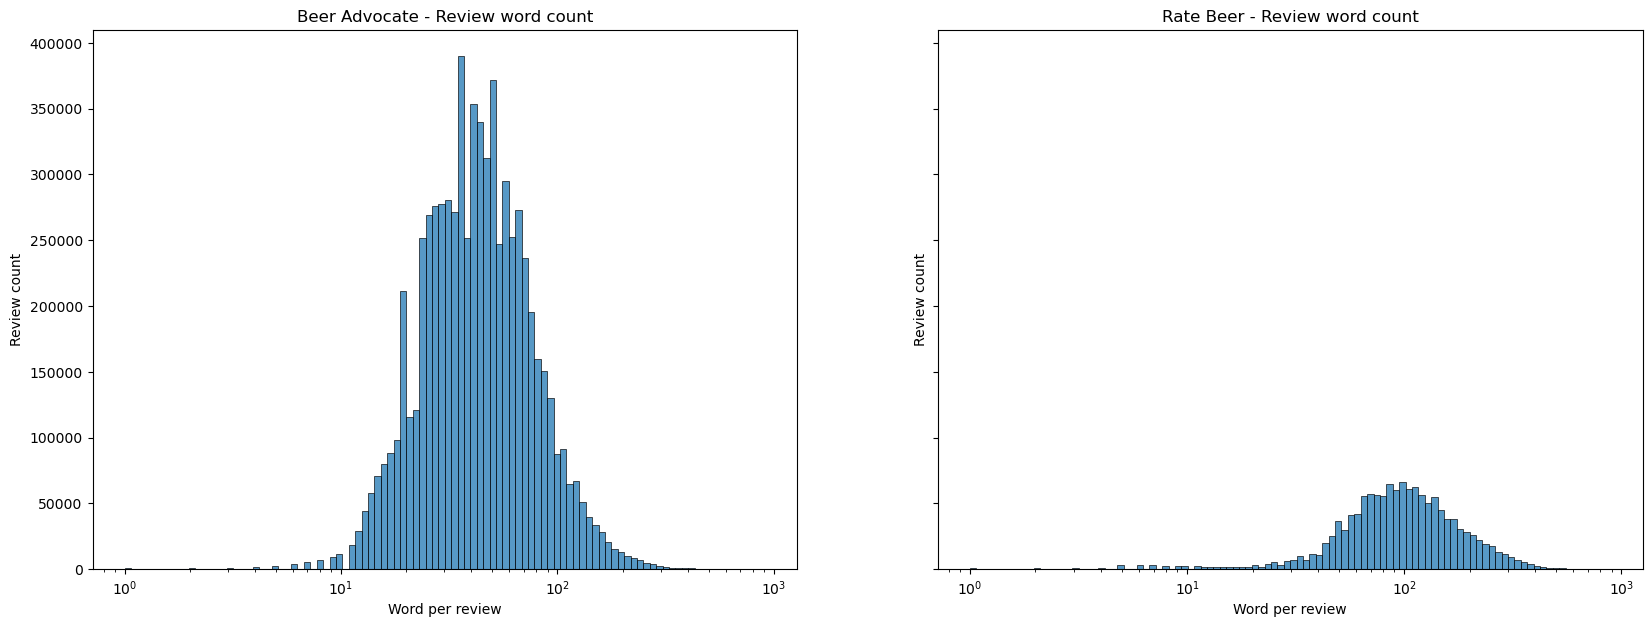

In [56]:
#Word count distributions for each site: 
fig, axes = plt.subplots(1, 2, figsize=(20, 7),sharey=True,sharex=False)

axes[1].set_title('Rate Beer - Review word count')
axes[1].set_xlabel('Word per review')
axes[1].set_ylabel('Review count')
sns.histplot(RB_counts,bins=100, log_scale=(True,False),ax=axes[0])

axes[0].set_title('Beer Advocate - Review word count')
axes[0].set_xlabel('Word per review')
axes[0].set_ylabel('Review count')
sns.histplot(BA_counts,bins=100, log_scale=(True,False),ax=axes[1])

In [57]:
#It looks like the two distributions might be nomal. Let's check:
print(diagnostic.kstest_normal(BA_counts.values, dist = 'norm'))
print(diagnostic.kstest_normal(RB_counts.values, dist = 'norm'))

(nan, nan)
(0.1319419644335701, 0.0009999999999998899)


We reject the null hypothesis that the distribution of words per review of the Beer Advocate dataset follows a normal distribution. We get NaN values for the test on distribution of words per reviews of the Rate Beer dataset. We suppose that the distribution was so far from normal that it did not work properly.

### Rating analysis

In [58]:
#We start by fetching the ratings
rb_ratings = NLP_utils.fetch_ratings("RateBeer")
ba_ratings = NLP_utils.fetch_ratings("BeerAdvocate")


<AxesSubplot:title={'center':'Rate beer - Review word count'}, xlabel='Word per review', ylabel='Review count'>

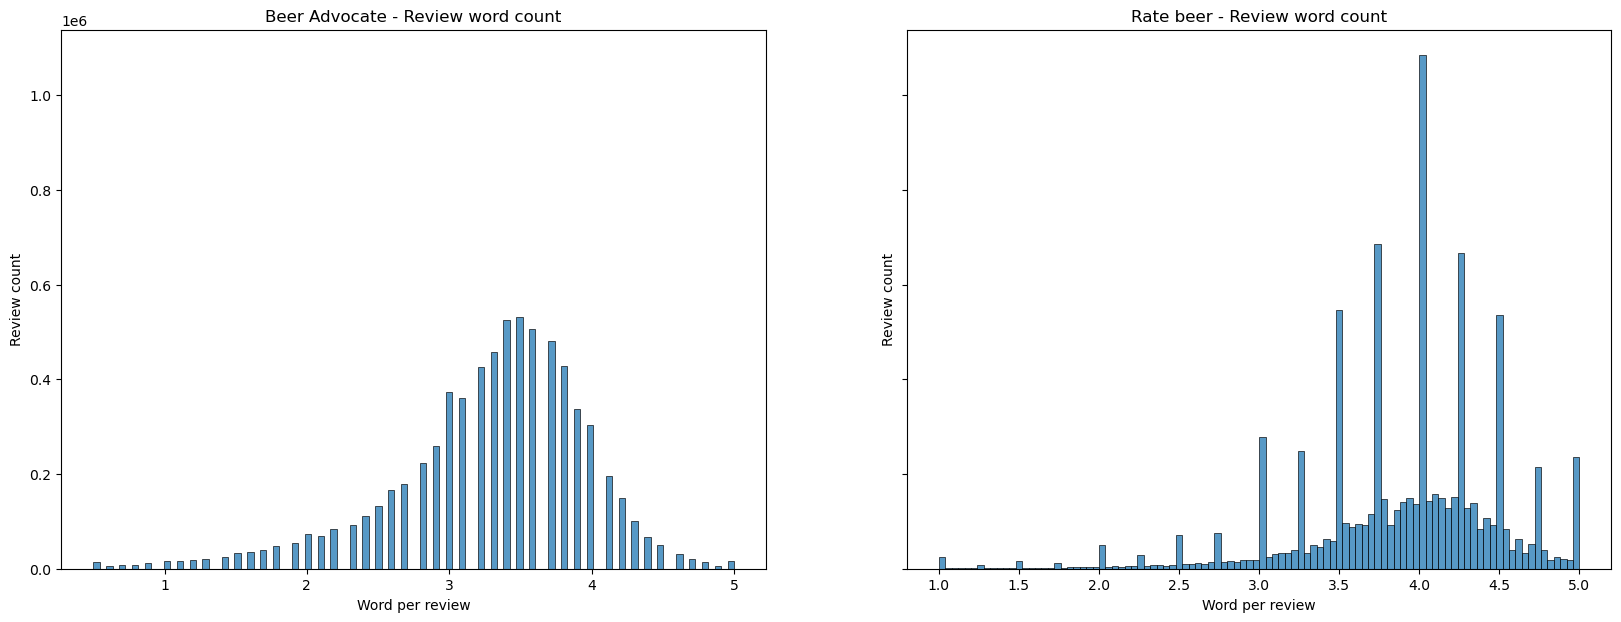

In [59]:
import matplotlib.pyplot as plt

import seaborn as sns
#Ratings distribution for each site
fig, axes = plt.subplots(1, 2, figsize=(20, 7),sharey=True,sharex=False)

axes[1].set_title('Rate beer - Review word count')
axes[1].set_xlabel('Word per review')
axes[1].set_ylabel('Review count')
sns.histplot(rb_ratings,bins=100, log_scale=(False,False),ax=axes[0])

axes[0].set_title('Beer Advocate - Review word count')
axes[0].set_xlabel('Word per review')
axes[0].set_ylabel('Review count')
sns.histplot(ba_ratings,bins=100, log_scale=(False,False),ax=axes[1])

In [60]:
#It looks like the first distribution might be normal. The second is most likely not (looks like users like giving
#marks that are round numbers more than fractional marks), but let's check!
print(diagnostic.kstest_normal(ba_ratings.values, dist = 'norm'))
print(diagnostic.kstest_normal(rb_ratings.values, dist = 'norm'))

(0.10663411311949195, 0.0009999999999998899)
(0.10254463736618269, 0.0009999999999998899)


In both cases, we reject the null hypothesis that the distributions are normal. 

<a id='sat'></a>
## SAT Dataset

__Warning__ : If you want more details of how the SAT_matched dataset was constructed with Vector Space Retrieval, the computation is available in 'Vector Space Retrieval for SAT dataset.ipynb'.

In [61]:
#We fetch the data from the Sat website with an auxiliary function
from functions import read_data

SAT_beers = read_data.fetch_satellite_df()
BA_beers = df_adv_beer_wrating
RB_beers = df_rb_beer_wrating

#We clean up the dataset:
# Keep only the maximum price, corresponding to the maximum volume in the 'vol' column of the dataframe
SAT_beers["prix"] = SAT_beers['prix'].str.findall('[0-9]*\.?[0-9]*').apply(lambda x : max([float(price) for price in x if len(price)!=0]))


SAT_beers.head(15)

,nom,prix,url,visual,type,brasseur,from,pression,ephemere,alcool,vol
0,Brooklyn East IPA,6.0,details/P1/,/static/media/bieres/visuelsBoissons/Brookylnb...,IPA,Brooklyn Brewery,USA,True,False,6.9,50
1,Cuvée des Trolls,6.0,details/P2/,/static/media/bieres/visuelsBoissons/cuveedest...,Blonde,Brasserie Dubuisson,Belgique,True,False,7.0,50
2,Elvis Juice,6.0,details/P3/,/static/media/bieres/visuelsBoissons/ElvisJuic...,IPA,Brewdog,Royaume-Uni,True,False,6.5,50
3,Grimbergen Blonde,6.0,details/P4/,/static/media/bieres/visuelsBoissons/grimberge...,Blonde,Grimbergen,Belgique,True,False,6.7,50
4,Gurten Lager,4.5,details/P5/,/static/media/bieres/visuelsBoissons/Gurten-2.png,Blonde,Gurten,Suisse,True,False,4.8,50
5,Charles Quint Rubis,6.0,details/P6/,/static/media/bieres/visuelsBoissons/biere-cha...,Ambrée,Haacht,Belgique,True,False,8.5,50
6,Lupulus Blonde,6.0,details/P7/,/static/media/bieres/visuelsBoissons/Lupulus.jpg,Blonde,Brasserie Lupulus,Belgique,True,False,8.5,50
7,O'Hara's Irish Stout,6.0,details/P8/,/static/media/bieres/visuelsBoissons/Oharas.jpeg,Stout,Carlow Brewing Company,Irelande,True,False,4.3,50
8,Schneider Weisse,6.0,details/P9/,/static/media/bieres/visuelsBoissons/Schneider...,Blanche,Weissen Bräuhaus G. Schneier & Sohn,Allemagne,True,False,5.4,50
9,Valaisanne Pale Ale,6.0,details/P10/,/static/media/bieres/visuelsBoissons/valaisann...,Pale Ale,Brasserie Valaisanne,Suisse,True,False,5.2,50


In [62]:
#Here are all the results of our vector space retrieval approach done in another notebook:
SAT_matched = pd.read_csv("DATA/matched_SATbeers.csv")
#this dataset contains the best matches of Sat beers with our datasets. We show the beer names, their ratings
#and their cosine similarity with the Sat beers.
display(SAT_matched)

,SAT name,Alcohol content,Beer Advocate name,Beer Advocate average rating,Similarity with BeerAdvocate,RateBeer name,RateBeer average rating,Similarity with RateBeer
0,Brooklyn East IPA,6.9,Brooklyn East India Pale Ale,3.65,0.901222,Brooklyn East IPA / India Pale Ale,3.40,0.926097
1,Cuvée des Trolls,7.0,Cuvée Des Trolls,3.53,0.809686,Dubuisson Cuvée des Trolls,3.06,0.900214
2,Elvis Juice,6.5,Elvis Juice,3.97,1.000000,Three Magnets Juice Juice Juice Storm Triple IPA,3.17,0.319643
3,Grimbergen Blonde,6.7,Grimbergen Blonde,3.69,0.727285,Grimbergen Blonde,3.19,0.619384
4,Gurten Lager,4.8,Gurten BäreGold,3.07,0.513870,Gurten Lager Hell,2.52,0.728060
...,...,...,...,...,...,...,...,...
61,Robustus 6,5.0,Robustus 6,3.77,0.856007,Riegele BierManufaktur Robustus 6,3.39,0.882417
62,Noctus 100,10.0,Noctus 100,3.93,0.896827,Riegele BierManufaktur Noctus 100,3.57,0.895519
63,Katerfrühstück,10.0,Schoppe Black Flag,3.79,0.553223,Schoppe Katerfrühstück,3.52,0.689878
64,Big Mountain Pale Ale,4.6,Oktoberfest,4.00,0.515817,Big Bear Mountain Pub Pale Ale,2.65,0.700622


In [63]:
#Some have low cosine similarity, lets check them

unmatched_beers = SAT_matched[(SAT_matched["Similarity with BeerAdvocate"]< 0.7) & (SAT_matched["Similarity with RateBeer"] < 0.7)]
display(unmatched_beers)


,SAT name,Alcohol content,Beer Advocate name,Beer Advocate average rating,Similarity with BeerAdvocate,RateBeer name,RateBeer average rating,Similarity with RateBeer
5,Charles Quint Rubis,8.5,Charles Quint Blonde / Keizer Karel Blond,3.76,0.605424,Charles Quint Rouge Rubis / Keizer Karel Robij...,3.36,0.630693
6,Lupulus Blonde,8.5,Lupulus,3.80,0.587973,Keltius / La Quince Humulus Lupulus Kince Lupulus,3.50,0.531351
10,Wittekop,5.0,Wheat Beer,3.37,0.470640,Wittekop (2007 - ),2.85,0.629302
12,Surette,6.8,Peach Surette,3.00,0.472944,Crooked Stave Autumn Surette,3.70,0.355629
13,Hopbliminal Messages,5.5,Medium & Message,3.53,0.429212,Amundsen I Love Rye,3.02,0.513551
24,Chimay bleue,9.0,Chimay Grande Réserve (Blue),4.28,0.544871,Chimay Bleue (Blue) / Grande Réserve,4.00,0.610482
26,Chimay rouge,7.0,Chimay Première (Red),4.10,0.606156,Chimay (Red / Rouge / Ale / Première),3.77,0.564462
39,Lupulus Hopera,6.0,Lupulus Hopera,3.86,0.672541,Keltius / La Quince Humulus Lupulus Kince Lupulus,3.50,0.506738
53,Sourtime blackcurrant,4.5,Maryensztadt Sweet Sixteen,3.91,0.552199,Maryensztadt Sourtime Czarna Porzeczka,3.24,0.679986
59,Uto-Pig,4.6,Pale Ale,3.74,0.579797,the Black Pig la Novice - Sun of a Beach,3.04,0.472086


In [64]:
#We remark that some matches with low similarity are actually good matches. 
#We choose to keep lines 5,6,10 (for RateBeer), 24,26,39,65 (for BeerAdvocate)
unmatched_beers.drop([5,6,10,24,26,39,65],axis=0,inplace=True)


In [65]:
# The final dataset of beers that were succesfully matched. Some matches are only good in one of the datasets, this will be taken into account into further analysis
SAT_matched = SAT_matched[~SAT_matched.isin(unmatched_beers)].dropna()
display(SAT_matched)
display(unmatched_beers)

,SAT name,Alcohol content,Beer Advocate name,Beer Advocate average rating,Similarity with BeerAdvocate,RateBeer name,RateBeer average rating,Similarity with RateBeer
0,Brooklyn East IPA,6.900,Brooklyn East India Pale Ale,3.65,0.901222,Brooklyn East IPA / India Pale Ale,3.40,0.926097
1,Cuvée des Trolls,7.000,Cuvée Des Trolls,3.53,0.809686,Dubuisson Cuvée des Trolls,3.06,0.900214
2,Elvis Juice,6.500,Elvis Juice,3.97,1.000000,Three Magnets Juice Juice Juice Storm Triple IPA,3.17,0.319643
3,Grimbergen Blonde,6.700,Grimbergen Blonde,3.69,0.727285,Grimbergen Blonde,3.19,0.619384
4,Gurten Lager,4.800,Gurten BäreGold,3.07,0.513870,Gurten Lager Hell,2.52,0.728060
5,Charles Quint Rubis,8.500,Charles Quint Blonde / Keizer Karel Blond,3.76,0.605424,Charles Quint Rouge Rubis / Keizer Karel Robij...,3.36,0.630693
6,Lupulus Blonde,8.500,Lupulus,3.80,0.587973,Keltius / La Quince Humulus Lupulus Kince Lupulus,3.50,0.531351
7,O'Hara's Irish Stout,4.300,O'Hara's Irish Stout,3.88,1.000000,Carlow OHaras Irish Stout,3.36,0.659770
8,Schneider Weisse,5.400,Schneider Weisse Tap 7 Unser Original,3.98,0.710189,Schneider Weisse Original,3.58,0.643668
9,Valaisanne Pale Ale,5.200,Valaisanne Lager,1.97,0.563868,Valaisanne Pale Ale,2.96,0.910535


,SAT name,Alcohol content,Beer Advocate name,Beer Advocate average rating,Similarity with BeerAdvocate,RateBeer name,RateBeer average rating,Similarity with RateBeer
12,Surette,6.8,Peach Surette,3.00,0.472944,Crooked Stave Autumn Surette,3.70,0.355629
13,Hopbliminal Messages,5.5,Medium & Message,3.53,0.429212,Amundsen I Love Rye,3.02,0.513551
53,Sourtime blackcurrant,4.5,Maryensztadt Sweet Sixteen,3.91,0.552199,Maryensztadt Sourtime Czarna Porzeczka,3.24,0.679986
59,Uto-Pig,4.6,Pale Ale,3.74,0.579797,the Black Pig la Novice - Sun of a Beach,3.04,0.472086
60,Pig-Up,6.1,Black IPA,3.40,0.511066,the Black Pig la Novice - Sun of a Beach,3.04,0.461648
63,Katerfrühstück,10.0,Schoppe Black Flag,3.79,0.553223,Schoppe Katerfrühstück,3.52,0.689878


<a id='draft'></a>

## Draft for our analysis : ranking beers and countries (with no correction of user bias)

In [32]:
#To facilitate our analysis, we add a column in the beer dataset corresponding to the location of the brewery.
location_to_brewery_name_adv=dict(zip(df_adv_breweries_wbeer.name,df_adv_breweries_wbeer.location)) #create a dictionary which keys are the breweries name and values are the breweries location
df_adv_beer_wrating["location"]=df_adv_beer_wrating.brewery_name.map(location_to_brewery_name_adv) #create a new location column indicating the location of the brewery
df_adv_beer_wrating.head()

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,abv,avg_computed,nbr_matched_valid_ratings,location
23,142544,Régab,37262,Societe des Brasseries du Gabon (SOBRAGA),Euro Pale Lager,1,1,2.88,4.5,2.880000,0,Gabon
24,19590,Barelegs Brew,10093,Strangford Lough Brewing Company Ltd,English Pale Ale,4,4,3.85,4.5,3.845000,0,Northern Ireland
25,19827,Legbiter,10093,Strangford Lough Brewing Company Ltd,English Pale Ale,75,59,3.45,4.8,3.439867,59,Northern Ireland
26,20841,St. Patrick's Ale,10093,Strangford Lough Brewing Company Ltd,English Pale Ale,8,6,3.86,6.0,3.888750,6,Northern Ireland
27,20842,St. Patrick's Best,10093,Strangford Lough Brewing Company Ltd,English Bitter,64,48,3.56,4.2,3.556094,48,Northern Ireland


In [33]:
location_to_brewery_name_rb=dict(zip(df_rb_breweries_wbeer.name,df_rb_breweries_wbeer.location)) #create a dictionary which keys are the breweries name and values are the breweries location
df_rb_beer_wrating["location"]=df_rb_beer_wrating.brewery_name.map(location_to_brewery_name_rb) #create a new location column indicating the location of the brewery
df_rb_beer_wrating.head()

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,avg,abv,avg_computed,nbr_matched_valid_ratings,location
0,410549,33 Export (Gabon),3198,Sobraga,Pale Lager,1,2.72,5.0,2.000000,0,Gabon
1,105273,Castel Beer (Gabon),3198,Sobraga,Pale Lager,10,2.18,5.2,1.910000,0,Gabon
2,19445,Régab,3198,Sobraga,Pale Lager,27,1.83,4.5,1.811111,0,Gabon
3,155699,Ards Bally Black Stout,13538,Ards Brewing Co.,Stout,6,3.18,4.6,3.866667,6,Northern Ireland
4,239097,Ards Belfast 366,13538,Ards Brewing Co.,Golden Ale/Blond Ale,1,2.79,4.2,3.000000,0,Northern Ireland


### Without correction

In [34]:
#Here we sort beers depending on their average rating for both datasets.  
df_beer_absolute_adv=df_adv_beer_wrating.sort_values(by="avg",ascending=False).reset_index()
df_beer_absolute_adv.head()

,index,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,abv,avg_computed,nbr_matched_valid_ratings,location
0,129230,143648,Let's Have A Beer,35047,Stoneyard Brewing Company,American IPA,1,1,5.0,6.0,5.0,0,"United States, New York"
1,173504,187817,Totes McGoats,32952,Three Notch'd Brewing Company,Oatmeal Stout,1,0,5.0,9.5,5.0,0,"United States, Virginia"
2,237156,136274,White Knuckle Wheat,36205,Hard Knocks Brewing,American Pale Wheat Ale,1,0,5.0,4.9,5.0,0,"United States, Oregon"
3,247890,270119,Lovers In The Surf,35323,Lazy Beach Brewing,American Stout,1,0,5.0,4.7,5.0,0,"United States, Texas"
4,212264,145372,Hopped On The High Seas (Simcoe),17981,Cigar City Brewing,American IPA,1,0,5.0,7.0,5.0,0,"United States, Florida"


In [35]:
#Here we sort beers depending on their average rating for both datasets.  
df_beer_absolute_rb=df_rb_beer_wrating.sort_values(by="avg",ascending=False).reset_index()
df_beer_absolute_rb.head()

,index,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,avg,abv,avg_computed,nbr_matched_valid_ratings,location
0,281425,166019,Toppling Goliath Kentucky Brunch,11242,Toppling Goliath,Imperial Stout,122,4.52,12.0,4.568033,0,"United States, Iowa"
1,132864,58057,Närke Kaggen Stormaktsporter,3682,Närke Kulturbryggeri,Imperial Stout,557,4.49,9.5,4.496230,0,Sweden
2,432666,4934,Westvleteren 12 (XII),623,Westvleteren Abdij St. Sixtus,Abt/Quadrupel,3838,4.43,10.2,4.448828,0,Belgium
3,428241,358322,3 Fonteinen Zenne y Frontera,2058,Brouwerij 3 Fonteinen,Lambic Style - Unblended,130,4.42,7.0,4.463846,130,Belgium
4,362725,116684,Goose Island Bourbon County Stout - Rare 2010,12853,Goose Island Beer Company &#40;AB-InBev&#41;,Imperial Stout,424,4.41,13.0,4.427830,0,"United States, Illinois"


In [36]:
#We want to extract the best beer brewed in each location
grouped_adv_beer=df_adv_beer_wrating.sort_values(["location",'avg'],ascending=False).groupby('location').head(1) #groups beers coming from beweries of the same location
top_adv_country=df_adv_beer_wrating.sort_values(["location",'avg'],ascending=False).groupby('location').head(1).reset_index(drop=True) #gives top beer for each location! 
top_adv_country.head()

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,abv,avg_computed,nbr_matched_valid_ratings,location
0,95961,Castle - Delta,189,Delta Beverages,Euro Pale Lager,1,1,3.18,5.0,3.180,0,Zimbabwe
1,101595,Mosi Gold Export Lager,27113,Zambian National Breweries,American Adjunct Lager,1,0,2.50,5.0,2.500,0,Zambia
2,123664,Dirty Stop Out - Kentucky Rye Barrel Aged,29967,Tiny Rebel Brewing Co.,American Stout,1,0,4.50,5.0,4.500,0,Wales
3,164062,Leatherback Brown Ale,22630,Fort Christian Brew Pub,American Brown Ale,1,0,4.33,4.5,4.330,0,Virgin Islands (U.S.)
4,128882,Foxy's Lager,17217,Foxy's Bar,American Pale Lager,2,0,2.88,NaN,2.875,0,Virgin Islands (British)


In [37]:
#We want to extract the best beer brewed in each location
grouped_rb_beer=df_rb_beer_wrating.sort_values(["location",'avg'],ascending=False).groupby('location').head(1) #groups beers coming from beweries of the same location
top_rb_country=df_rb_beer_wrating.sort_values(["location",'avg'],ascending=False).groupby('location').head(1).reset_index(drop=True) #gives top beer for each location! 
top_rb_country.head()

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,avg,abv,avg_computed,nbr_matched_valid_ratings,location
0,7519,Golden Pilsner (Zimbabwe),1689,Delta Breweries (SABMiller),Pale Lager,19,2.24,3.8,2.173684,0,Zimbabwe
1,12703,Chibuku Shake Shake,2332,National Breweries PLC (Zambia) (SABMiller),Traditional Ale,12,2.17,6.0,1.941667,0,Zambia
2,507598,Lines Line CD - Double Barrel Farm Blend (Burg...,27770,Lines Brew Co.,Sour/Wild Ale,10,3.95,4.9,4.440000,0,Wales
3,202873,St. John Brewers Virgin Islands VI Massive Cof...,7816,St. John Brewers - The Tap Room,Imperial Stout,8,3.34,9.0,3.537500,0,Virgin Islands (U.S.)
4,457911,Cooper Island Best Bitter,29038,Cooper Island Brewing Co,Premium Bitter/ESB,1,NaN,NaN,3.500000,0,Virgin Islands (British)


In [38]:
#Now that we have the best beer brewed in each location, let's rank locations
top_ranked_adv_country=top_adv_country.sort_values(by="avg",ascending=False).reset_index()
top_ranked_adv_country

,index,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,abv,avg_computed,nbr_matched_valid_ratings,location
0,197,268722,Blonde,48440,Brasserie Solstice,American Blonde Ale,2,0,5.00,5.5,5.000,0,France
1,41,109524,Glasstown Ale,33640,Glasstown Brewing Co.,American Amber / Red Ale,2,0,5.00,NaN,5.000,0,"United States, New Jersey"
2,65,214313,Mole Imperial Stout,24817,Bonfire Brewing Co.,American Double / Imperial Stout,1,0,5.00,NaN,5.000,0,"United States, Colorado"
3,62,223013,TrHOPical Fusion,39382,Bowigens Beer Company,American Double / Imperial IPA,1,0,5.00,8.4,5.000,0,"United States, Florida"
4,61,144500,Hop'lin With Cluster Flies,30015,Southbound Brewing Company,Saison / Farmhouse Ale,1,0,5.00,NaN,5.000,0,"United States, Georgia"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,238,141277,So.B.Bra,15606,Brakina,Euro Pale Lager,1,0,2.34,4.2,2.340,0,Burkina Faso
260,144,90417,Hammerhead Amber (a.k.a. Manta Dark),30613,Stone Money Brewing Company,American Amber / Red Lager,3,1,2.32,NaN,2.720,0,Micronesia
261,150,142556,Carlsberg Malawi Chill,37258,Carlsberg Malawi Brewery,Euro Pale Lager,1,0,2.09,4.0,2.090,0,Malawi
262,74,164830,Barbican,39821,Aujan Industries Co.,Low Alcohol Beer,2,0,1.94,NaN,1.940,0,United Arab Emirates


In [39]:
#Now that we have the best beer brewed in each location, let's rank locations
top_ranked_rb_country=top_rb_country.sort_values(by="avg",ascending=False).reset_index()
top_ranked_rb_country

,index,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,avg,abv,avg_computed,nbr_matched_valid_ratings,location
0,46,166019,Toppling Goliath Kentucky Brunch,11242,Toppling Goliath,Imperial Stout,122,4.52,12.0,4.568033,0,"United States, Iowa"
1,80,58057,Närke Kaggen Stormaktsporter,3682,Närke Kulturbryggeri,Imperial Stout,557,4.49,9.5,4.496230,0,Sweden
2,248,4934,Westvleteren 12 (XII),623,Westvleteren Abdij St. Sixtus,Abt/Quadrupel,3838,4.43,10.2,4.448828,0,Belgium
3,48,116684,Goose Island Bourbon County Stout - Rare 2010,12853,Goose Island Beer Company &#40;AB-InBev&#41;,Imperial Stout,424,4.41,13.0,4.427830,0,"United States, Illinois"
4,11,224377,New Glarus R & D Sour Fruit - Wild Blackberry,1248,New Glarus Brewing Company,Sour/Wild Ale,118,4.36,5.0,4.406780,0,"United States, Wisconsin"
...,...,...,...,...,...,...,...,...,...,...,...,...
260,157,41318,Maluti Premium Lager,5398,Maluti Mountain Brewery (SAB Miller),Pale Lager,75,1.94,4.8,1.896000,0,Lesotho
261,156,14082,Club Beer (Liberia),2573,Monrovia Breweries,Pale Lager,30,1.91,NaN,1.790000,0,Liberia
262,182,37328,Prestige Lager,4976,Brasserie Nationale dHaiti - BRANA (Heineken),Pale Lager,209,1.88,5.6,1.874641,0,Haiti
263,93,23405,Star Lager (Sierra Leone),4534,Sierra Leone Brewery (Heineken),Pale Lager,17,1.86,5.0,1.717647,0,Sierra Leone


## Implementation of the correction

In [40]:
#Computation of the average rating of the beers
rb_average_rating=df_rb_beer_wrating.avg.mean()

In [41]:
small_rating=pd.read_csv("DATA/RateBeer_ratings_part_0.csv") 
df_grouped_by_users_ratings=small_rating.groupby(["user_id"]).rating.sum().to_frame() 
del small_rating
for i in range(1,15):
    small_rating=pd.read_csv('DATA/RateBeer_ratings_part_{}.csv'.format(i))
    df_partial_grouped_by_users_ratings=small_rating.groupby(["user_id"]).rating.sum().to_frame()#We group the ratings by users and style and return the mean ratings of each user for each style tried
    df_grouped_by_users_ratings=pd.concat([df_grouped_by_users_ratings,df_partial_grouped_by_users_ratings]).groupby(["user_id"]).sum()
    del small_rating
    
df_grouped_by_users_ratings=df_grouped_by_users_ratings.reset_index()
df_grouped_by_users_ratings.head()

,user_id,rating
0,2,184.9
1,3,717.1
2,7,148.6
3,10,10.3
4,15,4.7


In [42]:
rb_user_to_nbr_ratings=dict(zip(df_rb_unique_users.user_id,df_rb_unique_users.nbr_ratings)) #create a dictionary which keys are the breweries name and values are the breweries location
df_grouped_by_users_ratings["nbr_ratings"]=df_grouped_by_users_ratings.user_id.map(rb_user_to_nbr_ratings)

#def attenuating(dataframe):
 #   max_rating=max(dataframe["nbr_ratings"])
  #  if dataframe.user_id.nbr_ratings==1:
   #     attenuation_coeff=0
    #if dataframe.user_id.nbr_ratings==max_rating:
     #   attenuation_coeff=1
    #else:
     #   attenuation_coeff=1/(max_rating-1)*dataframe.user_id.nbr_ratings
    #return attenuation_coeff


def attenuating(row,max_rating):
    if row.nbr_ratings==1.0:
        attenuation_coeff=0
    if row.nbr_ratings==max_rating:
        attenuation_coeff=1
    else:
        attenuation_coeff=1/(max_rating-1)*row.nbr_ratings-1/(max_rating-1)
    return attenuation_coeff

In [43]:
maximum_rating=max(df_grouped_by_users_ratings["nbr_ratings"])
df_grouped_by_users_ratings["attenuation coeff"]=df_grouped_by_users_ratings.apply(lambda row: attenuating(row,maximum_rating),axis=1)
df_grouped_by_users_ratings["bias"]=(df_grouped_by_users_ratings["rating"]/df_grouped_by_users_ratings["nbr_ratings"]-rb_average_rating)*df_grouped_by_users_ratings["attenuation coeff"]
df_grouped_by_users_ratings["bias"]
df_grouped_by_users_ratings.head()

,user_id,rating,nbr_ratings,attenuation coeff,bias
0,2,184.9,52.0,0.001091,0.000577
1,3,717.1,219.0,0.004663,0.001155
2,7,148.6,42.0,0.000877,0.000449
3,10,10.3,5.0,0.000086,-0.000083
4,15,4.7,1.0,0.000000,0.000000


In [44]:

rb_user_to_bias=dict(zip(df_grouped_by_users_ratings.user_id,df_grouped_by_users_ratings.bias))
small_rating=pd.read_csv("DATA/RateBeer_ratings_part_0.csv") 
small_rating["bias"]=small_rating.user_id.map(rb_user_to_bias)
small_rating["debiased_rating"]=small_rating["rating"]-small_rating["bias"]
df_grouped_by_beer=small_rating.groupby(["beer_id"]).debiased_rating.sum().to_frame() 
#small rating 0 to csv 
del small_rating

def f (dataframe):
    debiased_rating=dataframe['rating']-dataframe['bias']
    if debiased_rating<0:
        debiased_rating=0
    if debiased_rating>5:
        debiased_rating=5
    return debiased_rating



for i in range(1,15):
    small_rating=pd.read_csv('DATA/RateBeer_ratings_part_{}.csv'.format(i))
    small_rating["bias"]=small_rating.user_id.map(rb_user_to_bias)
    small_rating["debiased_rating"]=small_rating["rating"]-small_rating["bias"]
    small_rating["debiased_rating"]=small_rating.apply(f,axis=1)
    #small rating i to csv 
    df_partial_grouped_by_beer=small_rating.groupby(["beer_id"]).debiased_rating.sum().to_frame()#We group the ratings by users and style and return the mean ratings of each user for each style tried
    df_grouped_by_beer=pd.concat([df_grouped_by_beer,df_partial_grouped_by_beer]).groupby(["beer_id"]).sum()
    del small_rating

df_grouped_by_beer.head()

,debiased_rating
beer_id,
1,3587.566280
2,2472.745524
3,2009.391555
4,1241.106902
5,1617.044851


In [45]:
df_grouped_by_beer=df_grouped_by_beer.reset_index()
rb_beer_to_debiased_rating=dict(zip(df_grouped_by_beer.beer_id,df_grouped_by_beer.debiased_rating))

In [46]:
rb_beer_to_nbr_ratings=dict(zip(df_rb_beer_wrating.beer_id,df_rb_beer_wrating.nbr_ratings))
df_rb_beer_wrating["debiased_avg"]=df_rb_beer_wrating.beer_id.map(rb_beer_to_debiased_rating)/df_rb_beer_wrating.beer_id.map(rb_beer_to_nbr_ratings)
#df_rb_beer_wrating to csv 
df_rb_beer_wrating.head()

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,avg,abv,avg_computed,nbr_matched_valid_ratings,location,debiased_avg
0,410549,33 Export (Gabon),3198,Sobraga,Pale Lager,1,2.72,5.0,2.000000,0,Gabon,2.020928
1,105273,Castel Beer (Gabon),3198,Sobraga,Pale Lager,10,2.18,5.2,1.910000,0,Gabon,1.941488
2,19445,Régab,3198,Sobraga,Pale Lager,27,1.83,4.5,1.811111,0,Gabon,1.838277
3,155699,Ards Bally Black Stout,13538,Ards Brewing Co.,Stout,6,3.18,4.6,3.866667,6,Northern Ireland,3.865927
4,239097,Ards Belfast 366,13538,Ards Brewing Co.,Golden Ale/Blond Ale,1,2.79,4.2,3.000000,0,Northern Ireland,2.979109


Text(0, 0.5, 'Review count')

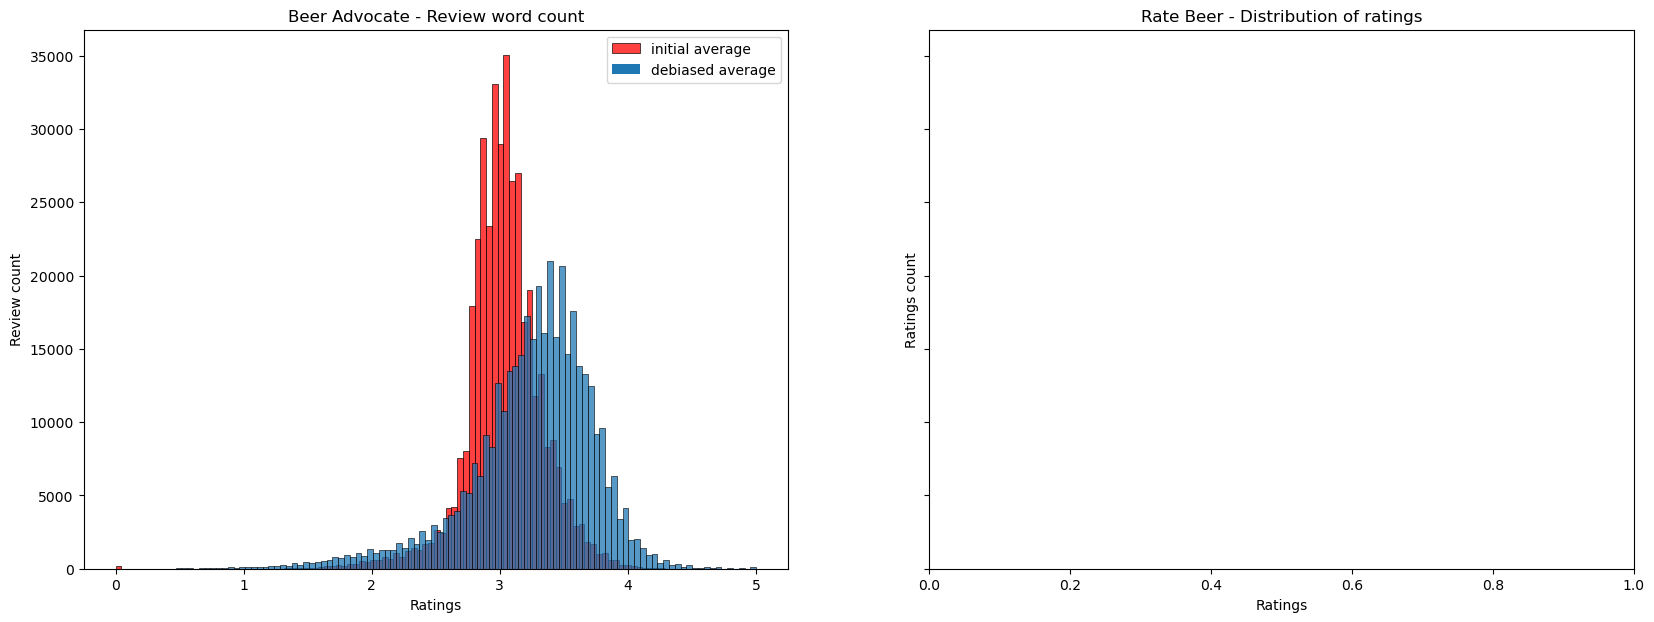

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(20, 7),sharey=True,sharex=False)

axes[1].set_title('Rate Beer - Distribution of ratings')
axes[1].set_xlabel('Ratings')
axes[1].set_ylabel('Ratings count')
sns.histplot(df_rb_beer_wrating["avg"],bins=100, log_scale=(False,False),ax=axes[0],color='red',label="initial average")
sns.histplot(df_rb_beer_wrating["debiased_avg"],bins=100, log_scale=(False,False),ax=axes[0],label="debiased average")
def legend_without_duplicate_labels(ax):
    """Erases duplicates in legend handles before plotting"""
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique))
legend_without_duplicate_labels(axes[0])
axes[0].set_title('Beer Advocate - Review word count')
axes[0].set_xlabel('Ratings')
axes[0].set_ylabel('Review count')
#sns.histplot(BA_counts,bins=100, log_scale=(True,False),ax=axes[1])

### Beer characteristics

In [17]:
Anglo_American_Ales=['Altbier', 'Barley Wine',"Bitter",'Premium Bitter/ESB',"Golden Ale/Blond Ale","Brown Ale", "California Common","Cream Ale","Black IPA","India Pale Ale (IPA)","Imperial IPA","Session IPA","Kölsch","American Pale Ale","Irish Ale","English Strong Ale", "American Strong Ale","Mild Ale","Amber Ale","English Pale Ale","Traditional ALe","Scotch Ale","Old Ale","Scottish Ale"]
Beligan_Style_Ales=["Belgian Ale","Belgian Strong Ale","Bière de Garde","Abbey Dubbel",'Abt/Quadrupel',"Saison","Abbey Tripel"]
Lagers=["Pale Lager","Premium Lager","Imperial Pils/Strong Pale Lager","India Style Lager","Amber Lager/Vienna",'Czech Pilsner (Světlý)',"Pilsener","Heller Bock","Doppelbock","Dumbler Bock","Weizen Bock","Esibock","Malt Liquor","Oktoberfest/Märzen","Radler/Shandy","Zwickel/Keller/Landbier","Dortmunder/Helles",'Dunkel/Tmavý','Schwarzbier','Polotmavý']
Stout_and_Porter=["Stout","Imperial Stout","Foreign Stout","Sweet Stout","Dry Stout","Porter","Baltic Porter","Imperial Porter"]
Wheat_beer=["Wheat Ale","Witbier",'German Hefeweizen','Dunkelweizen','German Kristallweizen']
Sour_beer=["Berliner Weisse","Sour/Wild Ale","Sour Red/Brown",'Grodziskie/Gose/Lichtenhainer','Lambic Style - Gueuze', 'Lambic Style - Unblended','Lambic Style - Faro','Lambic Style - Fruit',"Grodziskie/Gose/Lichtenhainer"]
Other_styles=["Spice/Herb/Vegetable","Smoked",'Fruit Beer',"Sahti/Gotlandsdricke/Koduõlu",'Low Alcohol','Specialty Grain']
Cider_Mead_Saké=['Cider','Mead','Saké - Daiginjo', 'Saké - Namasaké','Saké - Ginjo', 'Saké - Infused', 'Saké - Tokubetsu','Saké - Junmai', 'Saké - Nigori', 'Saké - Koshu', 'Saké - Taru','Saké - Honjozo', 'Saké - Genshu', 'Saké - Futsu-shu','Perry']
beer_style_dict={key: "Anglo American Ales" for key in Anglo_American_Ales}|{key: "Belgian Style Ales" for key in Beligan_Style_Ales}|{key:"Lagers" for key in Lagers}|{key:"Stout and Porter" for key in Stout_and_Porter}|{key:"Wheat beer" for key in Wheat_beer}|{key:"Sour beer" for key in Sour_beer}|{key:"Other styles" for key in Other_styles}|{key:"Cider, Mead and Saké" for key in Cider_Mead_Saké}


df_rb_beer_wrating["streamline_style"]=df_rb_beer_wrating["style"].map(beer_style_dict)

In [18]:
states=['United States, Wisconsin', 'United States, Georgia',
    'United States, North Carolina', 'United States, Arkansas',
       'United States, Louisiana', 'United States, West Virginia',
       'United States, California', 'United States, Washington',
       'United States, Massachusetts', 'United States, New Jersey',
       'United States, Maryland', 'United States, Arizona',
       'United States, Pennsylvania', 'United States, Indiana',
       'United States, Montana', 'United States, South Dakota',
       'United States, Tennessee', 'United States, Mississippi',
       'United States, Virginia', 'United States, Missouri',
       'United States, Maine', 'United States, Alabama',
       'United States, New Hampshire', 'United States, Delaware',
       'United States, Iowa', 'United States, Minnesota',
       'United States, Kentucky', 'United States, Nebraska',
       'United States, Wyoming', 'United States, Vermont',
       'United States, New Mexico', 'United States, Alaska',
       'United States, Rhode Island', 'United States, Kansas',
       'United States, Idaho', 'United States, Washington DC',
       'United States, Ohio', 'United States, Michigan',
       'United States, North Dakota', 'United States, Nevada',
       'United States, Oregon', 'United States, Hawaii',
       'United States, Connecticut', 'United States, Texas',
       'United States, Illinois', 'United States, South Carolina',
       'United States, Oklahoma', 'United States, Utah','United States, Florida','United States, Colorado','United States, New York']
kingdoms=["England",'Northern Ireland',"Scotland","Wales"]

country_dict={key:"United Kingdom of Great Britain and Northern Ireland" for key in kingdoms}|{key:"United States of America" for key in states}|{'Virgin Islands (British)':"United Kingdom of Great Britain and Northern Ireland",'Northern Marianas':'Northern Mariana Islands','South Ossetia':'Georgia','Dem Rep of Congo':'Congo','Nagorno-Karabakh':'Azerbaijan','Transdniestra':'Moldova','Saint Vincent and The Grenadines':'Saint Vincent and the Grenadines','Trinidad & Tobago':'Trinidad and Tobago',"Kosovo":"Albania","Reunion":"Réunion","Virgin Islands (U.S.)":"United States of America",'Tibet':"China","Abkhazia":"Georgia",'Cape Verde Islands':'Cabo Verde',"Fiji Islands":"Fiji",'Turkish Republic of Cyprus':'Cyprus','Antigua & Barbuda':'Antigua and Barbuda'}

df_rb_beer_wrating["Country"]=df_rb_beer_wrating.location.replace(country_dict)

In [19]:
df_rb_beer_wrating["Country"]=df_rb_beer_wrating.location.replace(country_dict)

In [20]:
df_rb_beer_wrating.sample(10)

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,avg,abv,avg_computed,nbr_matched_valid_ratings,location,debiased_avg,streamline_style,Country
270423,420856,The Virginia Beer Co. Single Hop Sessions - Ja...,27273,The Virginia Beer Company,Session IPA,1,2.98,5.2,3.200000,0,"United States, Virginia",3.182644,Anglo American Ales,United States of America
362550,439140,Forbidden Root Ryez & Shine,19572,Forbidden Root Brewing Company,Saison,1,3.11,6.1,3.800000,0,"United States, Illinois",3.794521,Belgian Style Ales,United States of America
27351,532729,Mascot Mango Sour Ale,24397,Mascot Brewery,Sour/Wild Ale,1,3.04,NaN,3.500000,0,Canada,3.512320,Sour beer,Canada
321631,388158,Blank Slate Fume - Lapsang Souchong Tea,14764,Blank Slate Brewing Company,Smoked,1,2.98,5.4,3.200000,0,"United States, Ohio",3.171757,Other styles,United States of America
294801,474015,Nantahala Trail Magic Ale No. 15 (Belgian Ston...,10997,Nantahala Brewing Company,Belgian Strong Ale,2,3.25,10.0,3.850000,0,"United States, North Carolina",3.795725,Belgian Style Ales,United States of America
244639,445487,Free Will Cloudy With A Chance Of Charcuterie,14030,Free Will Brewing Company,India Pale Ale (IPA),9,3.44,7.0,3.655556,0,"United States, Pennsylvania",3.632770,Anglo American Ales,United States of America
87842,455055,Malt Lager,2874,Australian Beer Company (Coca-Cola Amatil),Pale Lager,1,2.92,4.2,2.900000,0,Australia,2.890009,Lagers,Australia
328510,84530,Mad Brewer Porter,8822,The Brew Keeper / Mad Brewer,Porter,20,2.90,5.2,2.960000,0,"United States, Ohio",2.940888,Stout and Porter,United States of America
203507,388913,Navigation Brewing Co. Summer Ale,20150,Navigation Brewing Company,Wheat Ale,1,3.09,5.4,3.700000,0,"United States, Massachusetts",3.701302,Wheat beer,United States of America
4303,531696,Norte Cream Ale,31406,Norte Brewery,Cream Ale,1,3.04,NaN,3.500000,0,Mexico,3.432732,Anglo American Ales,Mexico


In [21]:
import pycountry_convert as pc

def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    if country_alpha2=="TL":
        country_continent_name="Asia"
    else:
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

df_rb_beer_wrating["Continent"]=df_rb_beer_wrating["Country"].apply(country_to_continent)

In [22]:
df_rb_beer_wrating.sample(10)

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,avg,abv,avg_computed,nbr_matched_valid_ratings,location,debiased_avg,streamline_style,Country,Continent
350423,235534,Upright Jeux Deau,10394,Upright Brewing,Sour/Wild Ale,57,3.84,NaN,3.901754,0,"United States, Oregon",3.878640,Sour beer,United States of America,North America
400541,466166,Unity Buckeye Session Bitter,29407,Unity Brewhouse,Bitter,2,2.90,3.4,2.850000,0,England,2.944597,Anglo American Ales,United Kingdom of Great Britain and Northern I...,Europe
355115,446583,Community Yessir! Pale Ale,15907,Community Beer Company,American Pale Ale,7,3.35,5.2,3.571429,0,"United States, Texas",3.565702,Anglo American Ales,United States of America,North America
308145,399839,Angry Chair Banana Cream Pie Strong Ale,16719,Angry Chair Brewing,Belgian Strong Ale,2,3.16,8.2,3.600000,0,"United States, Florida",3.573205,Belgian Style Ales,United States of America,North America
32080,511605,Brewin Bar Monde Ginza IPA,31183,Brewin Bar Monde,India Pale Ale (IPA),1,2.79,5.5,2.300000,0,Japan,2.261544,Anglo American Ales,Japan,Asia
419208,67617,Moorhouses Santas Piste,400,Moorhouses,Premium Bitter/ESB,4,3.16,4.5,3.325000,0,England,3.332212,Anglo American Ales,United Kingdom of Great Britain and Northern I...,Europe
32765,327539,Harvestmoon Dancing Summer,8928,Harvestmoon (Japan),Golden Ale/Blond Ale,1,2.84,4.5,3.400000,0,Japan,3.367619,Anglo American Ales,Japan,Asia
231388,415946,Seedstock Vienna Lager,27037,Seedstock Brewery,Amber Lager/Vienna,4,3.17,5.7,3.400000,0,"United States, Colorado",3.360644,Lagers,United States of America,North America
369477,51871,Americas Thoroughbred Red,2989,Americas Brewpub,Amber Lager/Vienna,1,2.66,NaN,2.500000,0,"United States, Illinois",2.515119,Lagers,United States of America,North America
28224,357142,OutSpoken Anvil Red Ale,22232,OutSpoken Brewing,Amber Ale,2,3.00,5.0,3.150000,0,Canada,3.154696,Anglo American Ales,Canada,North America


In [23]:
beer_features=pd.DataFrame(df_rb_beer_wrating[["abv","streamline_style","Continent"]])
beer_features.dropna(inplace=True)
categorical_columns=["streamline_style","Continent"]
beer_features=pd.get_dummies(beer_features, columns=categorical_columns)
beer_features.head()

,abv,streamline_style_Anglo American Ales,streamline_style_Belgian Style Ales,"streamline_style_Cider, Mead and Saké",streamline_style_Lagers,streamline_style_Other styles,streamline_style_Sour beer,streamline_style_Stout and Porter,streamline_style_Wheat beer,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
0,5.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,5.2,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,4.5,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,4.6,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,4.2,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

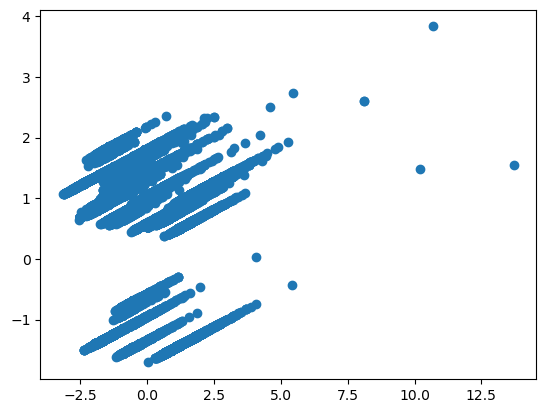

In [25]:
scaled_features = StandardScaler().fit(beer_features).transform(beer_features)
X_reduced_PCA = PCA(n_components=2,random_state=0).fit_transform(scaled_features)

plt.scatter(X_reduced_PCA[:,0], X_reduced_PCA[:,1])

In [26]:
mypca=PCA(n_components=2,random_state=0)
mypca.fit_transform(scaled_features)
mypca.explained_variance_ratio_

array([0.1428654 , 0.10029122])

In [39]:
def plot_sse(features_X, start=10, end=20):
    sse = []
    for k in range(start, end):
        # Assign the labels to the clusters
        kmeans = KMeans(n_clusters=k, random_state=10,n_init=10).fit(features_X)
        sse.append({"k": k, "sse": kmeans.inertia_})
    sse=pd.DataFrame(sse)
    plt.plot(sse.k, sse.sse)
    plt.xlabel("K")
    plt.ylabel("Sum of Squared Errors")
    

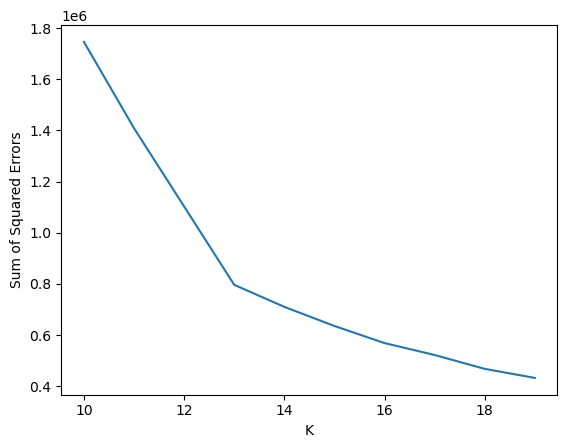

In [40]:
plot_sse(scaled_features)

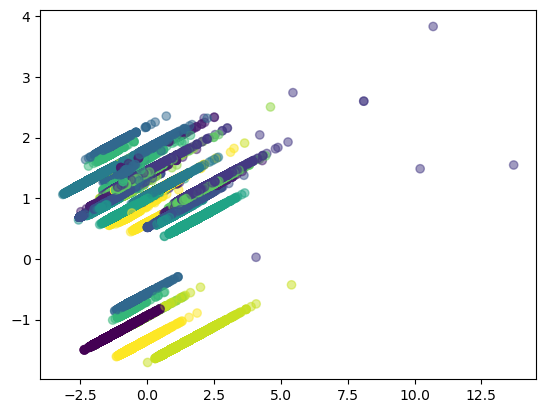

In [56]:
labels=0
cluster = KMeans(n_clusters=13, random_state=0,n_init=10).fit(scaled_features)
plt.scatter(X_reduced_PCA[:,0], X_reduced_PCA[:,1],c=cluster.labels_,alpha=0.5)

In [47]:
mypca=PCA(n_components=15,random_state=0)
mypca.fit_transform(scaled_features)
mypca.explained_variance_ratio_

array([1.42865552e-01, 1.00296273e-01, 8.47501827e-02, 7.58720122e-02,
       7.40849211e-02, 7.20735302e-02, 7.12366191e-02, 7.03864168e-02,
       6.76833376e-02, 6.70423010e-02, 6.57564098e-02, 6.31719866e-02,
       4.47804583e-02, 1.79651548e-30, 7.27032821e-31])

In [61]:
print(cluster.labels_)

[8 8 8 ... 5 5 5]


In [53]:
labels.labels_()

AttributeError: 'numpy.ndarray' object has no attribute 'labels_'

In [66]:
#beer_features=pd.DataFrame(df_rb_beer_wrating[["abv","streamline_style","Continent"]])
#beer_features.dropna(inplace=True)
df_rb_beer_wrating_test=df_rb_beer_wrating.dropna(subset=["abv","streamline_style","Continent"])
df_rb_beer_wrating_test.head()
#df_rb_beer_wrating_test["cluster"]=cluster.labels_
#df_rb_beer_wrating_test["cluster"]

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,avg,abv,avg_computed,nbr_matched_valid_ratings,location,debiased_avg,streamline_style,Country,Continent
0,410549,33 Export (Gabon),3198,Sobraga,Pale Lager,1,2.72,5.0,2.000000,0,Gabon,2.020928,Lagers,Gabon,Africa
1,105273,Castel Beer (Gabon),3198,Sobraga,Pale Lager,10,2.18,5.2,1.910000,0,Gabon,1.941488,Lagers,Gabon,Africa
2,19445,Régab,3198,Sobraga,Pale Lager,27,1.83,4.5,1.811111,0,Gabon,1.838277,Lagers,Gabon,Africa
3,155699,Ards Bally Black Stout,13538,Ards Brewing Co.,Stout,6,3.18,4.6,3.866667,6,Northern Ireland,3.865927,Stout and Porter,United Kingdom of Great Britain and Northern I...,Europe
4,239097,Ards Belfast 366,13538,Ards Brewing Co.,Golden Ale/Blond Ale,1,2.79,4.2,3.000000,0,Northern Ireland,2.979109,Anglo American Ales,United Kingdom of Great Britain and Northern I...,Europe


In [67]:
df_rb_beer_wrating_test["cluster"]=cluster.labels_
df_rb_beer_wrating_test["cluster"]

0         8
1         8
2         8
3         2
4         0
         ..
442072    5
442073    6
442074    5
442075    5
442076    5
Name: cluster, Length: 352119, dtype: int32

In [69]:
df_rb_beer_wrating_test["cluster"].unique()

array([ 8,  2,  0,  6,  7,  5,  9,  3,  4,  1, 11, 12, 10], dtype=int32)

In [79]:
rb_grouped_by_cluster=df_rb_beer_wrating_test.groupby(["cluster"]).debiased_avg
rb_grouped_by_cluster.describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,65945.0,3.207934,0.379663,0.499434,2.999841,3.223130,3.452213,5.000000
1,2205.0,3.018187,0.610268,0.485245,2.673254,3.101632,3.428206,4.999966
2,40481.0,3.510267,0.375170,0.500053,3.312089,3.538080,3.743530,5.000000
3,26289.0,3.110316,0.536382,0.485245,2.869400,3.209057,3.465734,5.000000
4,8309.0,2.959074,0.703856,0.467619,2.593014,3.157959,3.474582,4.900000
5,45993.0,2.899422,0.584715,0.473782,2.569288,3.007910,3.311818,5.000000
6,17496.0,3.126870,0.405087,0.600090,2.917221,3.164853,3.383180,5.000000
7,17480.0,3.508924,0.388171,0.504186,3.327362,3.561724,3.757697,4.999918
8,1210.0,2.701072,0.767796,0.499890,2.099890,2.725811,3.274665,5.000000


<AxesSubplot:>

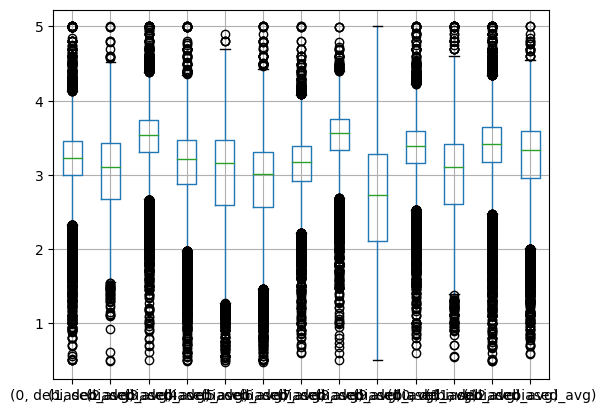

In [82]:
df_rb_beer_wrating_test.groupby(["cluster"]).boxplot(column=['debiased_avg'],subplots=False)